In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
medal=pd.read_csv('athlete_events.csv')
region=pd.read_csv('noc_regions.csv')

In [6]:
medal.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Exploring data

In [10]:
medal.shape

(271116, 15)

In [11]:
medal.size

4066740

In [12]:
medal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [13]:
medal.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [20]:
medal.dropna(subset='Medal') 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


# Merging the datasets

In [28]:
athlete_df=medal.merge(region,how='left',on='NOC')

In [29]:
athlete_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [30]:
athlete_df.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [32]:
athlete_df.query('Team == "India"').head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [34]:
top_10_countries=athlete_df.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

<AxesSubplot:ylabel='Team'>

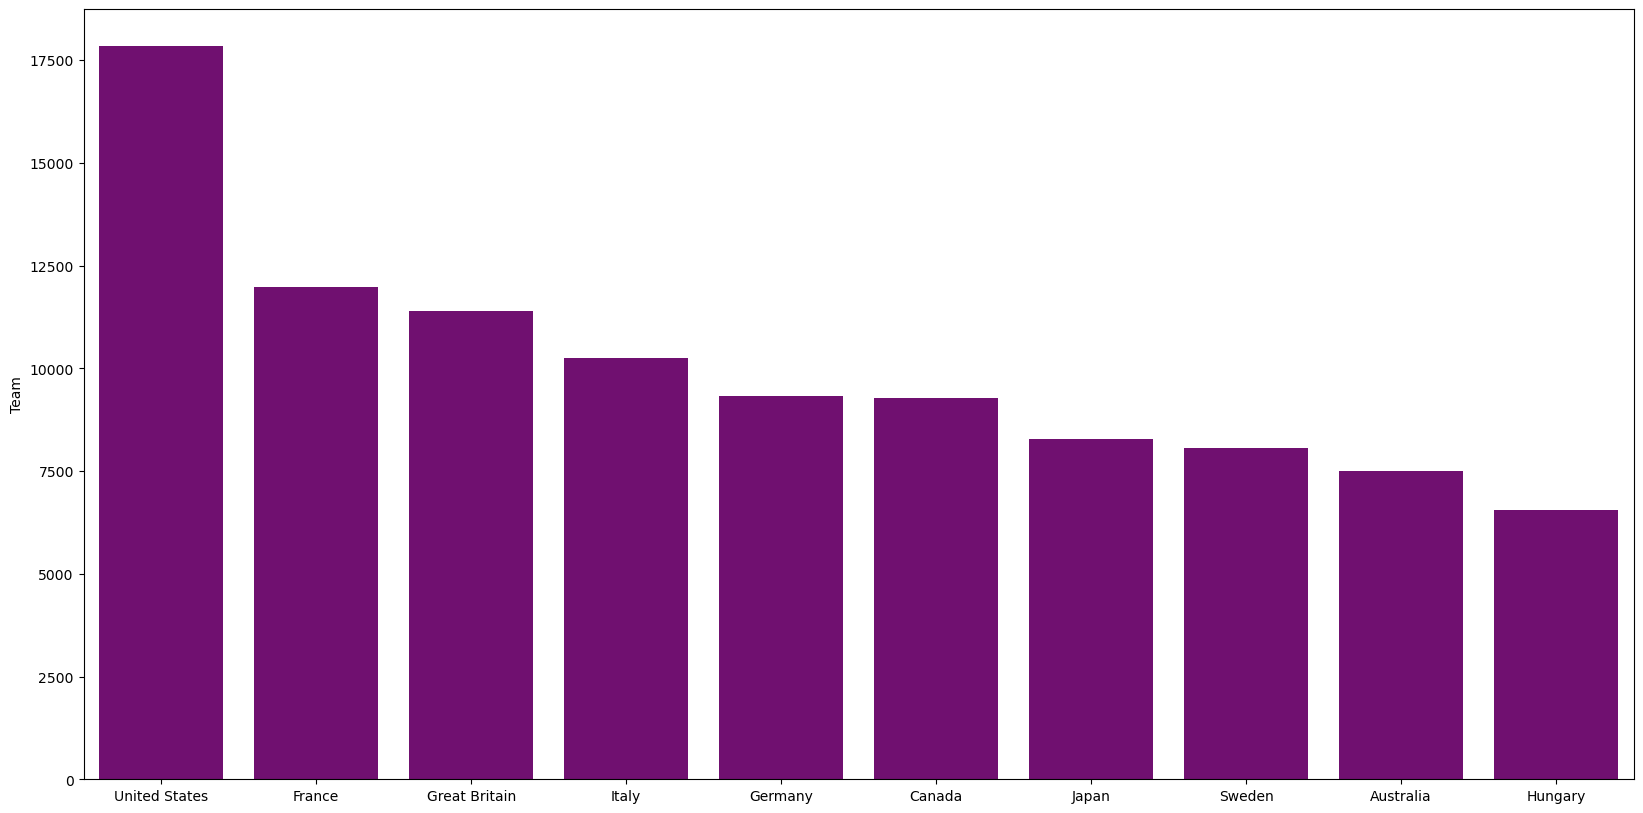

In [40]:
plt.figure(figsize=(20,10))
sns.barplot(data=athlete_df,x=top_10_countries.index,y=top_10_countries,color='Purple')


In [43]:
participants_by_year=athlete_df.Year.value_counts()
participants_by_year


1992    16413
1988    14676
2000    13821
1996    13780
2016    13688
2008    13602
2004    13443
2012    12920
1972    11959
1984    11588
1976    10502
1968    10479
1964     9480
1952     9358
1960     9235
1980     8937
1948     7480
1936     7401
1956     6434
1924     5693
1928     5574
2014     4891
2010     4402
2006     4382
1920     4292
2002     4109
1912     4040
1998     3605
1932     3321
1994     3160
1908     3101
1900     1936
1906     1733
1904     1301
1896      380
Name: Year, dtype: int64

Text(0, 0.5, 'participants')

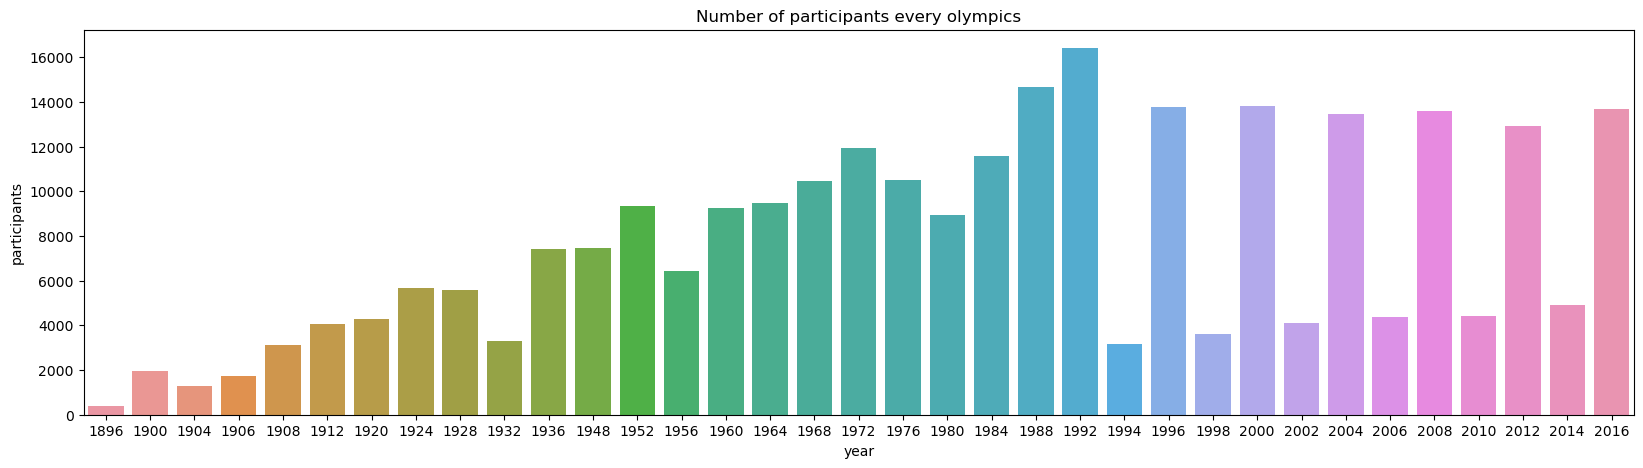

In [54]:
plt.figure(figsize=(20,5))
sns.barplot(data=athlete_df,x=participants_by_year.index,y=participants_by_year)
plt.title('Number of participants every olympics')
plt.xlabel('year')
plt.ylabel('participants')

In [57]:
athlete_df_summer = athlete_df.drop(athlete_df[athlete_df['Season'] == 'Winter'].index)
athlete_df_summer

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN


In [59]:
participants_by_year_summer=athlete_df_summer.Year.value_counts()
participants_by_year_summer

2000    13821
1996    13780
2016    13688
2008    13602
2004    13443
1992    12977
2012    12920
1988    12037
1972    10304
1984     9454
1976     8641
1968     8588
1952     8270
1960     8119
1964     7702
1980     7191
1936     6506
1948     6405
1924     5233
1956     5127
1928     4992
1920     4292
1912     4040
1908     3101
1932     2969
1900     1936
1906     1733
1904     1301
1896      380
Name: Year, dtype: int64

Text(0, 0.5, 'participants')

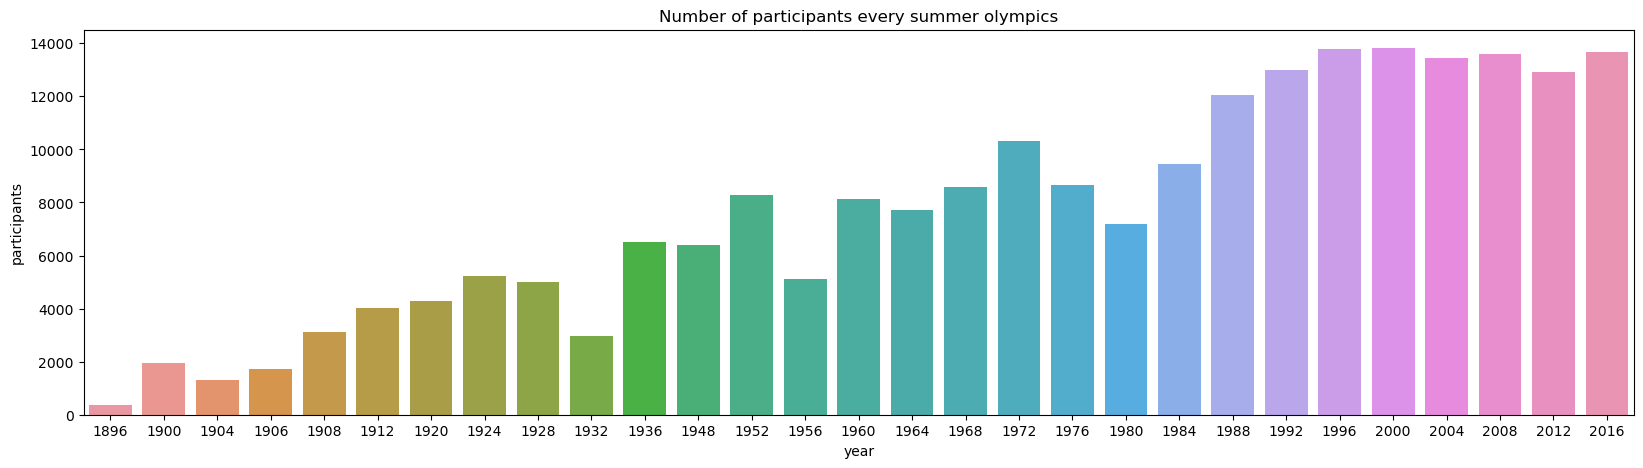

In [60]:
plt.figure(figsize=(20,5))
sns.barplot(data=athlete_df,x=participants_by_year_summer.index,y=participants_by_year_summer)
plt.title('Number of participants every summer olympics')
plt.xlabel('year')
plt.ylabel('participants')

# Now let's just work on Summer Olympics

In [65]:
athlete_df=athlete_df.drop(athlete_df[athlete_df['Season'] == 'Winter'].index)

In [66]:
athlete_df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [68]:
female_participants=athlete_df.drop(athlete_df[athlete_df['Sex']=='M'].index)
female_participants

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN
271099,135560,Stavroula Zygouri,F,36.0,171.0,63.0,Greece,GRE,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Women's Middleweight, Freestyle",NaN,Greece,NaN
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,Russia,NaN
271103,135563,Olesya Nikolayevna Zykina,F,23.0,171.0,64.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,Silver,Russia,NaN


In [72]:
f_participants_year = athlete_df['Year'].value_counts()
f_participants_year

2000    13821
1996    13780
2016    13688
2008    13602
2004    13443
1992    12977
2012    12920
1988    12037
1972    10304
1984     9454
1976     8641
1968     8588
1952     8270
1960     8119
1964     7702
1980     7191
1936     6506
1948     6405
1924     5233
1956     5127
1928     4992
1920     4292
1912     4040
1908     3101
1932     2969
1900     1936
1906     1733
1904     1301
1896      380
Name: Year, dtype: int64

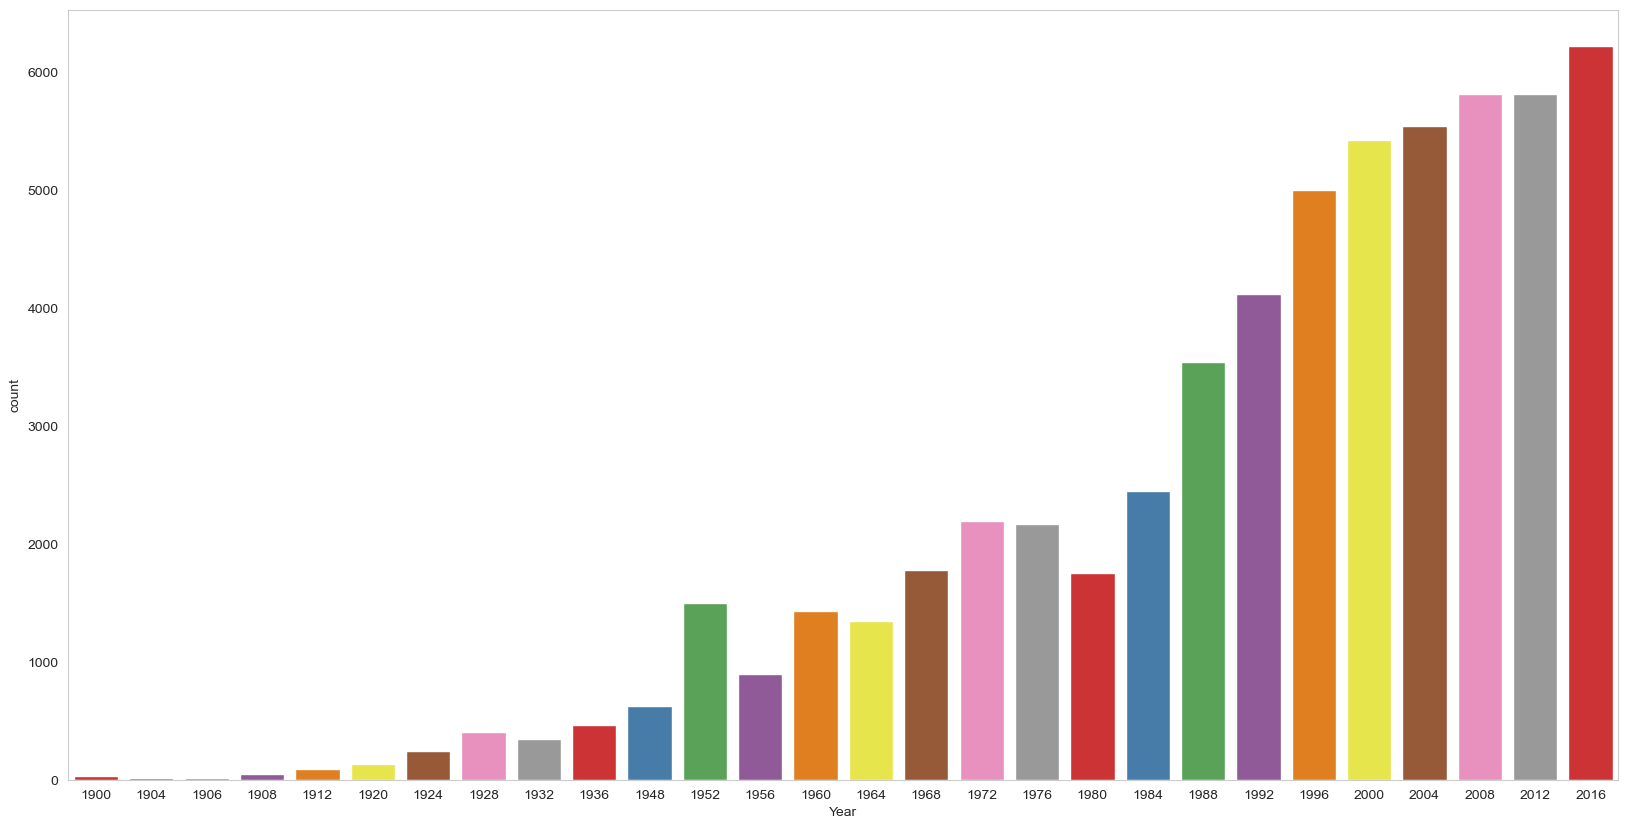

In [94]:
plt.figure(figsize=(20,10))
sns.countplot(data=female_participants, x='Year',palette='Set1')
plt.grid(False)





In [88]:
gender_counts = athlete_df.Sex.value_counts()
gender_counts

M    163109
F     59443
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x7fdd19b3a610>,
 [Text(0.7349375482397473, -0.8184539084074003, 'M'),
  Text(-0.7349375482397472, 0.8184539084074004, 'F')],
 [Text(0.4008750263125894, -0.44642940458585467, '73.3%'),
  Text(-0.40087502631258937, 0.4464294045858547, '26.7%')])

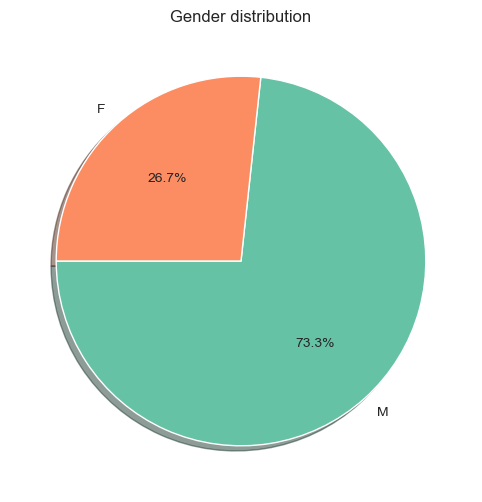

In [93]:
plt.figure(figsize=(12,6))
plt.title('Gender distribution')
plt.pie(gender_counts,labels = gender_counts.index,shadow ='True',autopct ='%1.1f%%',startangle =180 )

In [98]:

gold_Medals = athletes_df[(athletes_df.Medal == 'Gold')]

In [99]:
gold_Medals = gold_Medals[np.isfinite(gold_Medals['Age'])]

In [104]:
gold_Medals.region.value_counts().reset_index(name='Medal').head(10)

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567
5,France,491
6,Sweden,479
7,Canada,461
8,Hungary,432
9,Norway,378


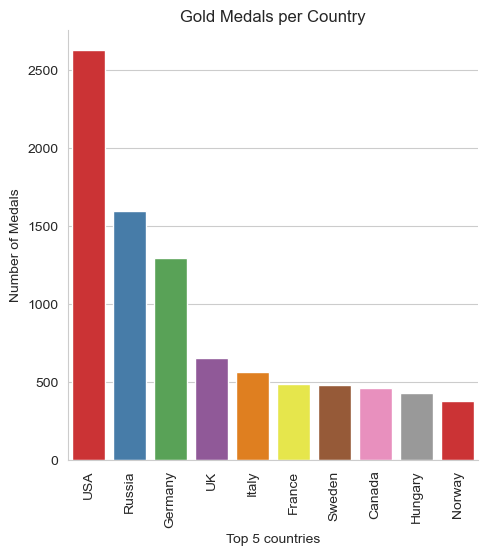

In [108]:
totalGold_Medals = gold_Medals.region.value_counts().reset_index(name='Medal').head(10)
gm=sns.catplot(x='index', y='Medal', data=totalGold_Medals,
               height=5, kind="bar", palette="Set1")
gm.set_xlabels("Top 5 countries")
gm.set_ylabels("Number of Medals")
plt.xticks(rotation=90)

plt.title('Gold Medals per Country');


# Build a model to predict number of medals a country will win 

In [112]:
def team_summary(data):
    return pd.Series({
        'team': data.iloc[0,:]["NOC"],
        'country': data.iloc[-1,:]["Team"],
        'year': data.iloc[0,:]["Year"],
        'events': len(data['Event'].unique()),
        'athletes': data.shape[0],
        'age': data["Age"].mean(),
        'height': data['Height'].mean(),
        'weight': data['Weight'].mean(),
        'medals': sum(~pd.isnull(data["Medal"]))
    })

team = athlete_df.groupby(["NOC", "Year"]).apply(team_summary)

In [113]:
team.head(5)

team      country  year  events  athletes        age    height  \
NOC Year                                                                  
AFG 1936  AFG  Afghanistan  1936       4        16  24.266667       NaN   
    1948  AFG  Afghanistan  1948       2        25        NaN       NaN   
    1956  AFG  Afghanistan  1956       1        12        NaN       NaN   
    1960  AFG  Afghanistan  1960      13        16  23.312500  170.6875   
    1964  AFG  Afghanistan  1964       8         8  22.000000  161.0000   

           weight  medals  
NOC Year                   
AFG 1936      NaN       0  
    1948      NaN       0  
    1956      NaN       0  
    1960  69.4375       0  
    1964  64.2500       0

In [115]:
team = team.reset_index(drop=True)
team = team.dropna()
team.head(5)

,team,country,year,events,athletes,age,height,weight,medals
0,AFG,Afghanistan,1960,13,16,23.312500,170.687500,69.437500,0
1,AFG,Afghanistan,1964,8,8,22.000000,161.000000,64.250000,0
2,AFG,Afghanistan,1968,5,5,23.200000,170.200000,70.000000,0
3,AFG,Afghanistan,1972,8,8,29.000000,168.333333,63.750000,0
4,AFG,Afghanistan,1980,11,11,23.636364,168.363636,63.181818,0


In [116]:
def prev_medals(data):
    data = data.sort_values("year", ascending=True)
    data["prev_medals"] = data["medals"].shift(1)
    data["prev_3_medals"] = data.rolling(3, closed="left", min_periods=1).mean()["medals"]
    return data

team = team.groupby(["team"]).apply(prev_medals)
team = team.reset_index(drop=True)
team = team[team["year"] > 1960]
team = team.round(1)



/var/folders/m8/9j2bhltn1sz63hvm37_7grhw0000gn/T/ipykernel_11667/1149363500.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['country', 'team'], dtype='object')
  data["prev_3_medals"] = data.rolling(3, closed="left", min_periods=1).mean()["medals"]
/var/folders/m8/9j2bhltn1sz63hvm37_7grhw0000gn/T/ipykernel_11667/1149363500.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['country', 'team'], dtype='object')
  data["prev_3_medals"] = data.rolling(3, closed="left", min_periods=1).mean()["medals"]
/var/folders/m8/9j2bhltn1sz63hvm37_7grhw0000gn/T/ipykernel_11667/1149363500.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated;

/var/folders/m8/9j2bhltn1sz63hvm37_7grhw0000gn/T/ipykernel_11667/1149363500.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['country', 'team'], dtype='object')
  data["prev_3_medals"] = data.rolling(3, closed="left", min_periods=1).mean()["medals"]
/var/folders/m8/9j2bhltn1sz63hvm37_7grhw0000gn/T/ipykernel_11667/1149363500.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['country', 'team'], dtype='object')
  data["prev_3_medals"] = data.rolling(3, closed="left", min_periods=1).mean()["medals"]
/var/folders/m8/9j2bhltn1sz63hvm37_7grhw0000gn/T/ipykernel_11667/1149363500.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated;

In [117]:
team.head(5)

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
1,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
2,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
3,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
4,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
5,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [118]:
team[team["team"] == "USA"]


,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
2497,USA,United States,1964,159,492,23.5,177.2,71.8,169,125.0,127.3
2498,USA,United States,1968,167,529,23.5,177.2,72.1,166,169.0,139.0
2499,USA,United States,1972,185,578,23.6,177.6,71.7,171,166.0,153.3
2500,USA,United States,1976,189,554,23.0,177.3,71.0,164,171.0,168.7
2501,USA,United States,1984,217,693,24.6,177.2,71.6,352,164.0,167.0
2502,USA,United States,1988,230,715,25.2,177.1,71.4,207,352.0,229.0
2503,USA,United States,1992,248,734,25.7,177.0,71.9,224,207.0,241.0
2504,USA,United States,1996,263,839,26.4,177.5,73.2,259,224.0,261.0
2505,USA,United States,2000,265,764,26.6,177.3,73.6,242,259.0,230.0
2506,USA,United States,2004,254,726,26.5,177.0,73.6,263,242.0,241.7


In [119]:
team.to_csv("teams.csv", index=False)


Working on Teams dataset

In [120]:
teams=pd.read_csv('teams.csv')

In [121]:
teams.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [124]:
teams.corr()['medals'] # we can see medals largely depend on athletes and prev_medals

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

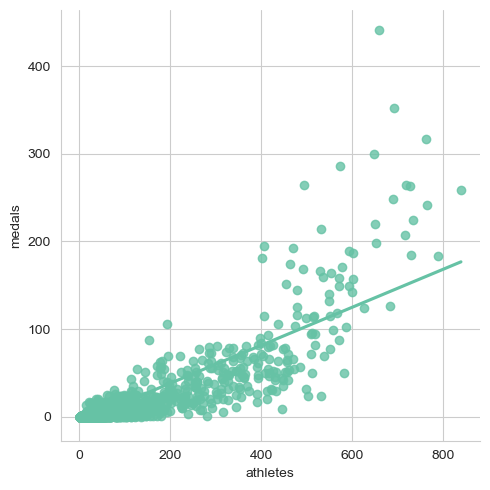

In [126]:
sns.lmplot(data=teams,x='athletes',y='medals',ci=None)

In [127]:
teams[teams.isnull().any(axis=1)].head(10)


,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
82,ARM,Armenia,1996,38,24.0,NaN,2
88,ARU,Aruba,1988,12,27.8,NaN,0
96,ASA,American Samoa,1988,6,27.0,NaN,0
131,AZE,Azerbaijan,1996,24,25.1,NaN,1
150,BAN,Bangladesh,1984,2,21.0,NaN,0


In [128]:
teams = teams.dropna()


In [129]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

In [131]:
train.shape


(1609, 7)

In [132]:
test.shape

(405, 7)

In [133]:
from sklearn.linear_model import LinearRegression


In [134]:
lm=LinearRegression()

In [135]:
predictors = ["athletes", "prev_medals"]


In [136]:
lm.fit(train[predictors], train["medals"])


LinearRegression()

In [152]:
predictions = lm.predict(test[predictors])



In [153]:
test.loc[test["predictions"] < 0, "predictions"] = 0


In [155]:
test["predictions"] = test["predictions"].round()
test


,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


In [156]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test["medals"], test["predictions"])
error

3.2987654320987656

In [157]:
teams.describe()["medals"]


count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [158]:
test[test["team"] == "USA"]


,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0


In [159]:
test[test["team"] == "IND"]


,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0
